In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('raw_punks.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10000 non-null  int64 
 1   types                10000 non-null  object
 2   rarity               10000 non-null  int64 
 3   skin                 10000 non-null  object
 4   total_traits         10000 non-null  int64 
 5   traits               9992 non-null   object
 6   total_hidden_traits  10000 non-null  int64 
 7   hidden_traits        629 non-null    object
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [4]:
df1[df1.traits.isnull()]

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
281,281,Male,7,Light,0,NaN,0,NaN
510,510,Male,9,Mid,0,NaN,0,NaN
641,641,Female,6,Light,0,NaN,0,NaN
741,741,Male,5,Dark,0,NaN,0,NaN
1050,1050,Female,8,Mid,0,NaN,0,NaN
2204,2204,Female,4,Dark,0,NaN,0,NaN
3307,3307,Male,3,Albino,0,NaN,0,NaN
6487,6487,Female,2,Albino,0,NaN,0,NaN


In [5]:
df1.fillna('',inplace=True)

In [6]:
df1.head()

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,
2,2,Female,8090,Light,1,Wild Hair,0,
3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,
4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,


In [7]:
df1.rarity.sort_values()

8348        1
6487        2
3307        3
2204        4
741         5
        ...  
1098     9996
2115     9997
2547     9998
419      9999
1025    10000
Name: rarity, Length: 10000, dtype: int64

In [8]:
df_types = df1.groupby('types').count().sort_values(by='id',ascending=False)

In [9]:
df_types

,id,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
types,,,,,,,
Male,6039,6039,6039,6039,6039,6039,6039
Female,3840,3840,3840,3840,3840,3840,3840
Zombie,88,88,88,88,88,88,88
Ape,24,24,24,24,24,24,24
Alien,9,9,9,9,9,9,9


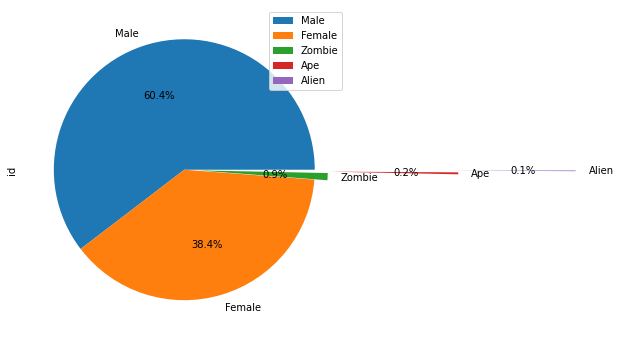

In [10]:
df_types.plot.pie(y='id',figsize=(6,6),explode=(0,0,0.1,1.1,2), 
             autopct = '%2.1f%%',legend=True)
plt.show()



In [11]:
df_skin = df1.groupby('skin').count().sort_values(by='id',ascending=False)
df_skin

,id,types,rarity,total_traits,traits,total_hidden_traits,hidden_traits
skin,,,,,,,
Mid,3031,3031,3031,3031,3031,3031,3031
Light,3006,3006,3006,3006,3006,3006,3006
Dark,2824,2824,2824,2824,2824,2824,2824
Albino,1018,1018,1018,1018,1018,1018,1018
Zombie,88,88,88,88,88,88,88
Ape,24,24,24,24,24,24,24
Alien,9,9,9,9,9,9,9


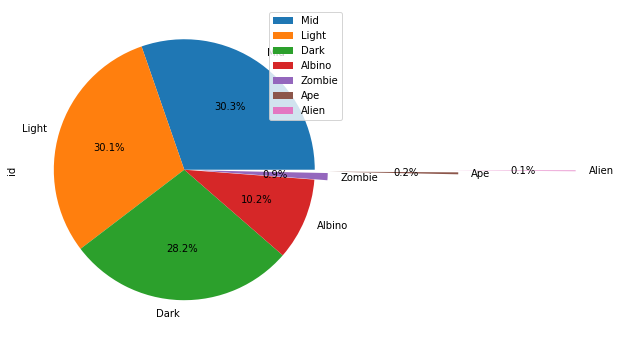

In [12]:
df_skin.plot.pie(y='id',figsize=(6,6),explode=(0,0,0,0,0.1,1.1,2), 
             autopct = '%2.1f%%',legend=True)
plt.show()

In [13]:
# rank rarity and perform some visualization

df_raros = df1.iloc[df1.rarity.sort_values().index]
df_raros

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
8348,8348,Male,1,Mid,7,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",0,
6487,6487,Female,2,Albino,0,,0,
3307,3307,Male,3,Albino,0,,0,
2204,2204,Female,4,Dark,0,,0,
741,741,Male,5,Dark,0,,0,
...,...,...,...,...,...,...,...,...
1098,1098,Male,9996,Dark,2,"Bandana,Earring",0,
2115,2115,Female,9997,Light,2,"Bandana,Earring",0,
2547,2547,Male,9998,Light,2,"Bandana,Earring",0,
419,419,Female,9999,Mid,2,"Bandana,Earring",0,


In [14]:
df_top_raros = df_raros.reset_index(drop=True)[['id','rarity','types','skin','total_traits','total_hidden_traits']][:50]
df_top_raros.head()

,id,rarity,types,skin,total_traits,total_hidden_traits
0,8348,1,Male,Mid,7,0
1,6487,2,Female,Albino,0,0
2,3307,3,Male,Albino,0,0
3,2204,4,Female,Dark,0,0
4,741,5,Male,Dark,0,0


In [15]:
df_top_50_skin = df_top_raros.groupby('skin').count().sort_values(by='total_traits',ascending=False)
df_top_50_skin

,id,rarity,types,total_traits,total_hidden_traits
skin,,,,,
Ape,21,21,21,21,21
Alien,9,9,9,9,9
Dark,7,7,7,7,7
Mid,7,7,7,7,7
Albino,3,3,3,3,3
Light,3,3,3,3,3


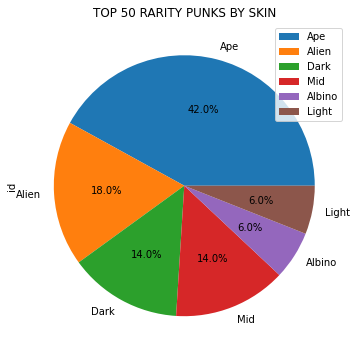

In [16]:
df_top_50_skin.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 50 RARITY PUNKS BY SKIN')

plt.show()

In [17]:
df_top_50_types = df_top_raros.groupby('types').count().sort_values(by='total_traits',ascending=False)
df_top_50_types

,id,rarity,skin,total_traits,total_hidden_traits
types,,,,,
Ape,21,21,21,21,21
Female,10,10,10,10,10
Male,10,10,10,10,10
Alien,9,9,9,9,9


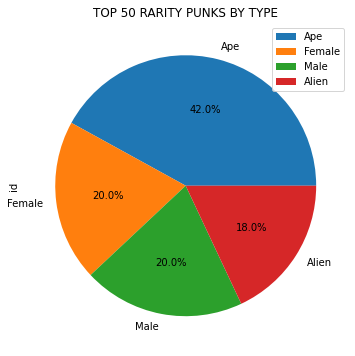

In [18]:
df_top_50_types.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 50 RARITY PUNKS BY TYPE')

plt.show()

In [19]:
# analysis en funcion de los traits
df1.traits



0                   Blonde Bob,Earring,Green Eye Shadow
1                                          Mohawk,Smile
2                                             Wild Hair
3                           Nerd Glasses,Pipe,Wild Hair
4                     Big Shades,Earring,Goat,Wild Hair
                             ...                       
9995               Purple Eye Shadow,Straight Hair Dark
9996                 Cigarette,Crazy Hair,Earring,Smile
9997                            Cap Forward,Front Beard
9998    Black Lipstick,Clown Eyes Green,Wild White Hair
9999                                Mohawk,Nerd Glasses
Name: traits, Length: 10000, dtype: object

In [20]:
df_traits = df1.groupby('total_traits').count().sort_values(by='id',ascending=False)
df_traits

,id,types,rarity,skin,traits,total_hidden_traits,hidden_traits
total_traits,,,,,,,
3,4501,4501,4501,4501,4501,4501,4501
2,3560,3560,3560,3560,3560,3560,3560
4,1420,1420,1420,1420,1420,1420,1420
1,333,333,333,333,333,333,333
5,166,166,166,166,166,166,166
6,11,11,11,11,11,11,11
0,8,8,8,8,8,8,8
7,1,1,1,1,1,1,1


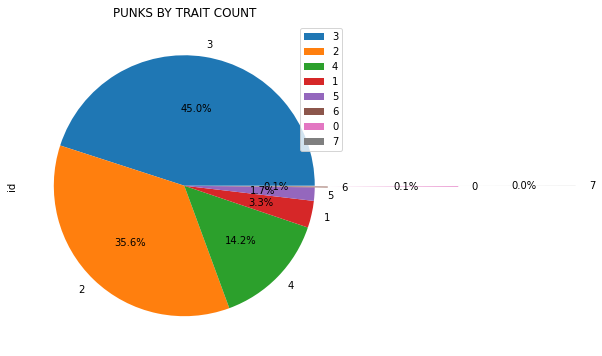

In [21]:
df_traits.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',explode=(0,0,0,0,0,0.1,1.1,2),legend=True,title='PUNKS BY TRAIT COUNT')

plt.show()

In [22]:
df_hidden_traits = df1.groupby('total_hidden_traits').count().sort_values(by='id',ascending=False)
df_hidden_traits

,id,types,rarity,skin,total_traits,traits,hidden_traits
total_hidden_traits,,,,,,,
0,9371,9371,9371,9371,9371,9371,9371
1,623,623,623,623,623,623,623
2,5,5,5,5,5,5,5
3,1,1,1,1,1,1,1


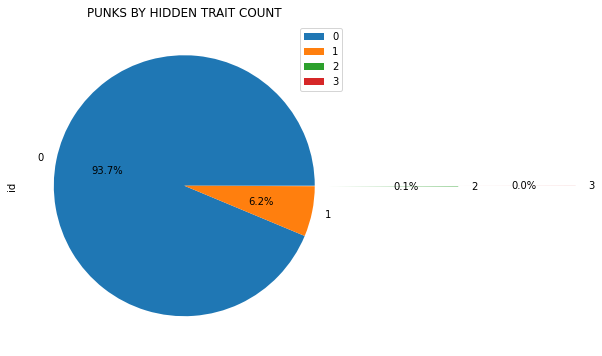

In [23]:
df_hidden_traits.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',explode=(0,0,1.1,2),legend=True,title='PUNKS BY HIDDEN TRAIT COUNT')

plt.show()

In [35]:
# cuantos punks tienen 7 atributos?
df_top_raros[df_top_raros.total_traits == 7]

,id,rarity,types,skin,total_traits,total_hidden_traits
0,8348,1,Male,Mid,7,0


In [36]:
# cuantos punks tienen 3 atributos ocultos?
df_top_raros[df_top_raros.total_hidden_traits == 3]

,id,rarity,types,skin,total_traits,total_hidden_traits
25,5949,26,Female,Dark,6,3


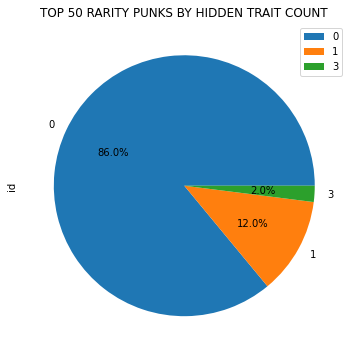

In [26]:
df_traits = df_raros[:50].groupby('total_hidden_traits').count()

df_traits.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 50 RARITY PUNKS BY HIDDEN TRAIT COUNT')

plt.show()

In [27]:
df_raros.reset_index(drop=True)[['total_traits','total_hidden_traits']][:50].describe().round(2)
df_raros

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
8348,8348,Male,1,Mid,7,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",0,
6487,6487,Female,2,Albino,0,,0,
3307,3307,Male,3,Albino,0,,0,
2204,2204,Female,4,Dark,0,,0,
741,741,Male,5,Dark,0,,0,
...,...,...,...,...,...,...,...,...
1098,1098,Male,9996,Dark,2,"Bandana,Earring",0,
2115,2115,Female,9997,Light,2,"Bandana,Earring",0,
2547,2547,Male,9998,Light,2,"Bandana,Earring",0,
419,419,Female,9999,Mid,2,"Bandana,Earring",0,


In [217]:
# analysis por el tipo de trait
df1.traits

0                   Blonde Bob,Earring,Green Eye Shadow
1                                          Mohawk,Smile
2                                             Wild Hair
3                           Nerd Glasses,Pipe,Wild Hair
4                     Big Shades,Earring,Goat,Wild Hair
                             ...                       
9995               Purple Eye Shadow,Straight Hair Dark
9996                 Cigarette,Crazy Hair,Earring,Smile
9997                            Cap Forward,Front Beard
9998    Black Lipstick,Clown Eyes Green,Wild White Hair
9999                                Mohawk,Nerd Glasses
Name: traits, Length: 10000, dtype: object

In [39]:
#get traits 
traits ={}
for items in df1.traits.str.split(','):
    for elem in items:        
        if len(elem) ==0:
            #print(type(elem))
            continue            
        if elem in traits:
            #print('exists, add one')
            traits[elem] += 1
        else:
            #print('not exist, create set to one ')
            traits[elem] = 1
    

In [40]:
len(traits)

89

In [96]:
traits.items()

dict_items([('Blonde Bob', 147), ('Earring', 2459), ('Green Eye Shadow', 271), ('Mohawk', 441), ('Smile', 238), ('Wild Hair', 447), ('Nerd Glasses', 572), ('Pipe', 317), ('Big Shades', 535), ('Goat', 295), ('Half Shaved', 147), ('Purple Eye Shadow', 262), ('Do-rag', 300), ('Clown Eyes Blue', 384), ('Spots', 123), ('Wild White Hair', 136), ('Luxurious Beard', 286), ('Messy Hair', 460), ('Big Beard', 146), ('Clown Nose', 212), ('Police Cap', 203), ('Blue Eye Shadow', 266), ('Black Lipstick', 617), ('Clown Eyes Green', 382), ('Straight Hair Dark', 148), ('Blonde Short', 129), ('Purple Lipstick', 655), ('Straight Hair Blonde', 144), ('Hot Lipstick', 696), ('Pilot Helmet', 54), ('Regular Shades', 527), ('Small Shades', 378), ('Stringy Hair', 463), ('Frown', 261), ('Eye Mask', 293), ('Muttonchops', 303), ('Bandana', 481), ('Horned Rim Glasses', 535), ('Crazy Hair', 414), ('Classic Shades', 502), ('Handlebars', 263), ('Mohawk Dark', 429), ('Dark Hair', 157), ('Peak Spike', 303), ('Cap', 351),

In [139]:
order_traits = dict(sorted(traits.items(),key= lambda x:x[1],reverse=True))

In [174]:
df_traits = pd.DataFrame(list(order_traits.items()),columns = ['trait','occurences']) 

In [175]:
df_traits

,trait,occurences
0,Earring,2459
1,Cigarette,961
2,Hot Lipstick,696
3,Purple Lipstick,655
4,Mole,644
...,...,...
84,Pilot Helmet,54
85,Choker,48
86,Beanie,44
87,Spots Teeth,1


In [194]:
data_top = df_traits[:50]

In [195]:
data_top.head()

,trait,occurences
0,Earring,2459
1,Cigarette,961
2,Hot Lipstick,696
3,Purple Lipstick,655
4,Mole,644


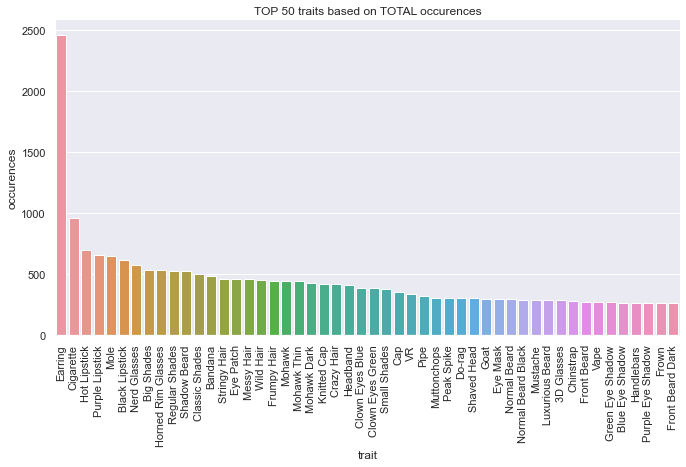

In [200]:
sns.catplot(x='trait',y='occurences',data= data_top,kind='bar',height=5, aspect=10/5)
plt.title('TOP 50 traits based on TOTAL occurences')
plt.xticks(rotation=90)
plt.show()

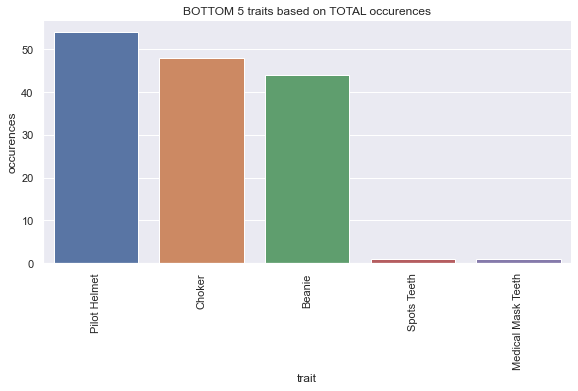

In [202]:
data_bottom = df_traits[-5:]
sns.catplot(x='trait',y='occurences',data= data_bottom,kind='bar',height=4, aspect=10/5)
plt.title('BOTTOM 5 traits based on TOTAL occurences')
plt.xticks(rotation=90)
plt.show()

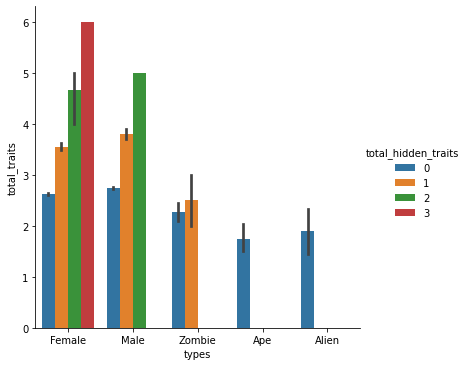

In [31]:
sns.catplot(x='types',y='total_traits',hue='total_hidden_traits',data= df1,kind='bar')

In [32]:
#get traits 
traits ={}
for items in df1.traits.str.split(','):
    for elem in items:        
        if len(elem) ==0:
            #print(type(elem))
            continue            
        if elem in traits:
            #print('exists, add one')
            traits[elem] += 1
        else:
            #print('not exist, create set to one ')
            traits[elem] = 1
    

In [33]:
len(traits)

89

In [34]:
traits

{'Blonde Bob': 147,
 'Earring': 2459,
 'Green Eye Shadow': 271,
 'Mohawk': 441,
 'Smile': 238,
 'Wild Hair': 447,
 'Nerd Glasses': 572,
 'Pipe': 317,
 'Big Shades': 535,
 'Goat': 295,
 'Half Shaved': 147,
 'Purple Eye Shadow': 262,
 'Do-rag': 300,
 'Clown Eyes Blue': 384,
 'Spots': 123,
 'Wild White Hair': 136,
 'Luxurious Beard': 286,
 'Messy Hair': 460,
 'Big Beard': 146,
 'Clown Nose': 212,
 'Police Cap': 203,
 'Blue Eye Shadow': 266,
 'Black Lipstick': 617,
 'Clown Eyes Green': 382,
 'Straight Hair Dark': 148,
 'Blonde Short': 129,
 'Purple Lipstick': 655,
 'Straight Hair Blonde': 144,
 'Hot Lipstick': 696,
 'Pilot Helmet': 54,
 'Regular Shades': 527,
 'Small Shades': 378,
 'Stringy Hair': 463,
 'Frown': 261,
 'Eye Mask': 293,
 'Muttonchops': 303,
 'Bandana': 481,
 'Horned Rim Glasses': 535,
 'Crazy Hair': 414,
 'Classic Shades': 502,
 'Handlebars': 263,
 'Mohawk Dark': 429,
 'Dark Hair': 157,
 'Peak Spike': 303,
 'Cap': 351,
 'Normal Beard Black': 289,
 'VR': 332,
 'Frumpy Hair': 